(560, 560, 3)


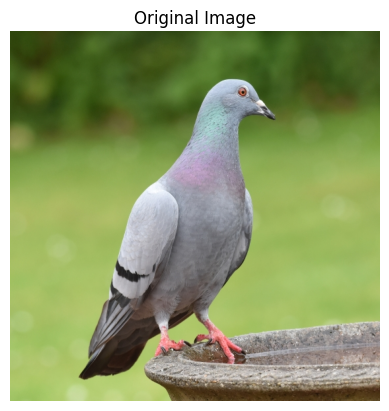

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

image_raw = imread("dove.jpg")
print(image_raw.shape)
plt.imshow(image_raw)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [4]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

(560, 560)


1.0


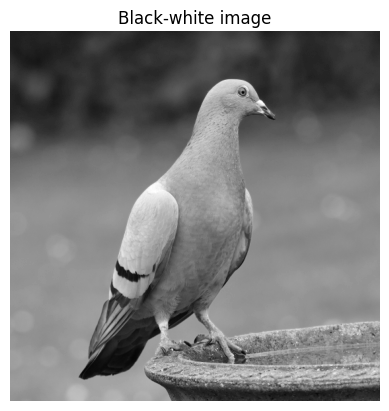

In [5]:
image_bw = image_sum/image_sum.max()
print(image_bw.max())
display_image(image_bw, 'Black-white image')

Cumulative_variance [0.58728499 0.72190459 0.78555092 0.82925233 0.86003609 0.88072009
 0.89592728 0.90566721 0.9128721  0.91946679 0.92538265 0.93064292
 0.93533939 0.93953779 0.94345266 0.94649695 0.94913434 0.95173218
 0.95413836 0.95624133 0.95825169 0.95998607 0.96162664 0.9631648
 0.96459798 0.96585682 0.96705582 0.96819379 0.96929082 0.9703401
 0.97132296 0.9722775  0.97312873 0.9739549  0.97474436 0.97551515
 0.97625305 0.9769569  0.97764857 0.97831941 0.97896458 0.97959728
 0.98018653 0.98074163 0.9812866  0.98181285 0.9823224  0.98280104
 0.98327016 0.98372899 0.98416964 0.98458849 0.98499847 0.98538634
 0.98576079 0.98612953 0.9864873  0.98683394 0.98716455 0.98747477
 0.98778099 0.98808222 0.98836537 0.9886394  0.98890481 0.98916681
 0.9894148  0.98965335 0.98988915 0.99011239 0.99032663 0.99053875
 0.9907437  0.99094662 0.99114405 0.9913354  0.99152036 0.99169839
 0.99187097 0.99203957 0.99220563 0.99237032 0.99252521 0.9926789
 0.99282753 0.99297325 0.99311565 0.99325548 

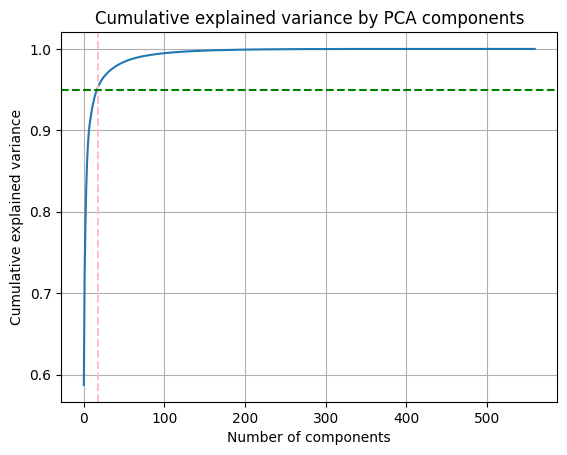

In [11]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("dove.jpg")
image_sum = image_raw.sum(axis=2)
image_bw = image_sum/image_sum.max()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_image_bw = scaler.fit_transform(image_bw)

pca = PCA()
pca.fit(scaled_image_bw)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative_variance {cumulative_variance}")
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance by PCA components')
plt.grid(True)

num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components required to cover 95% of the variance: {num_components}')

plt.axvline(x=num_components, color='pink', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

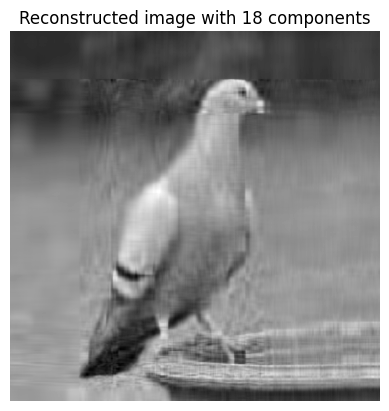

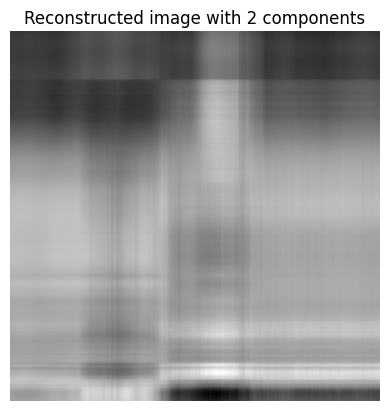

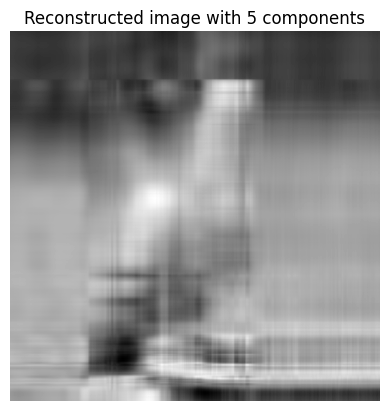

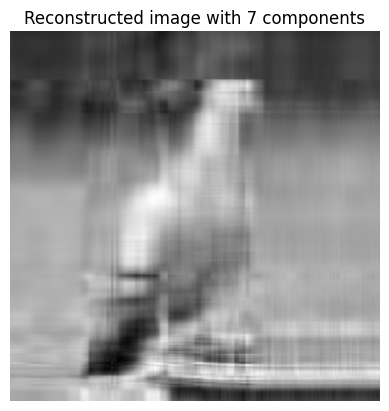

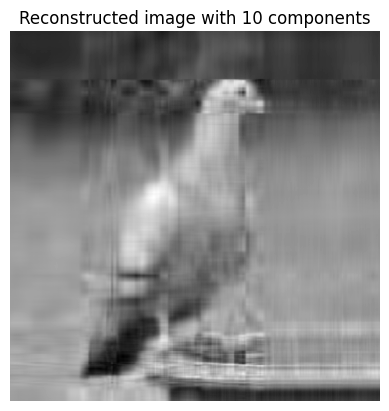

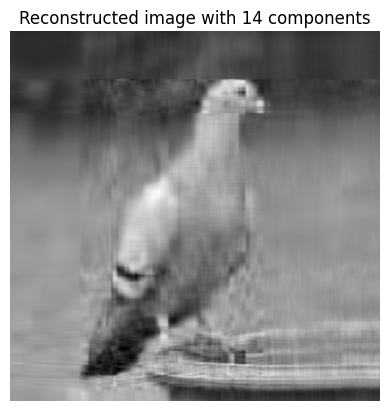

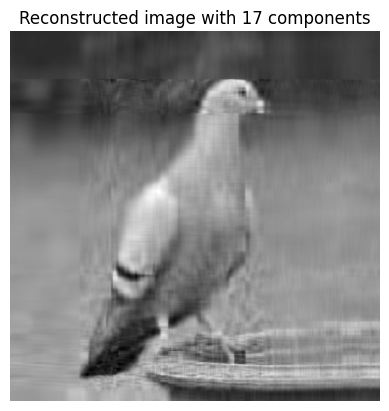

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
def reconstruct_and_display_image(num_components):
    pca_limited = PCA(n_components=num_components)
    scaled_image_bw_pca = pca_limited.fit_transform(scaled_image_bw)
    image_reconstructed = pca_limited.inverse_transform(scaled_image_bw_pca)
    image_reconstructed_unscaled = scaler.inverse_transform(image_reconstructed)
    image_reconstructed_clipped = np.clip(image_reconstructed_unscaled, 0, 1)
    display_image(image_reconstructed_clipped, f'Reconstructed image with {num_components} components')
reconstruct_and_display_image(num_components)
reconstruct_and_display_image(2)
reconstruct_and_display_image(5)
reconstruct_and_display_image(7)
reconstruct_and_display_image(10)
reconstruct_and_display_image(14)
reconstruct_and_display_image(17)